## Traffic Sign Classification 

This project is classification of Traffic Signs that are in real environments. 

Traffic sign classification is the process of automatically recognizing traffic signs such as speed limits, along the road. This technology can be used not only for self driving cars but also to guide human drivers. This project involves training the model to identify which class a traffic sign belongs to

I have used the basic libraries necessary for modelling a network

In [2]:
import numpy as np
import tensorflow as tf
import keras
import os, shutil
import pandas as pd
from tensorflow import keras

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

from keras import models
from keras import layers
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import itertools  
import seaborn as sns

TensorFlow version: 2.5.0
Keras version: 2.5.0


## The Dataset

This project uses the German Traffic Sign Dataset. This dataset can be ideal for single-image, multi-class classification problem. This set has more than 50,000 traffic sign images. The images are large, real-life and are classified into 40 classes. The link to this dataset is https://benchmark.ini.rub.de/gtsrb_news.html. I have downloaded the dataset from Kaggle (link: https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)

# 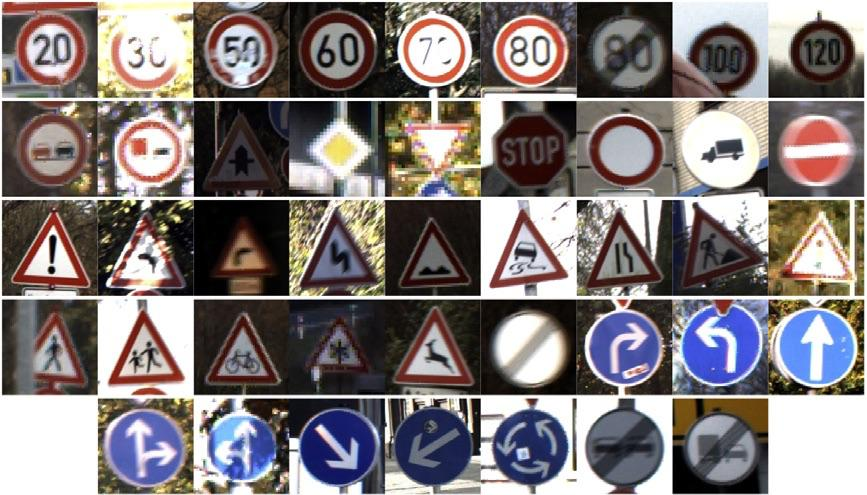

#### The train.csv file has the number of images and the unique number of classes


In [3]:
#####Defining paths for the dataset
base_dir = 'C:/CI/Data/Traffic_Sign/'
#To find the number of categories
data = pd.read_csv(base_dir + 'Train.csv')
n_classes = data['ClassId'].nunique()

val_dir = 'C:/CI/Data/Traffic_Sign/Validation/'
train_dir = 'C:/CI/Data/Traffic_Sign/Train/'
test_dir = 'C:/CI/Data/Traffic_Sign/test/'
print(n_classes)

43


### Model TSR - 1 

Data Preprocessing with flow_from_directory . Creating validation folder and moving files randomly training dataset

In [4]:
#######Creating Validation and test datasets from training dataset
import random
no_of_files = 10
if not os.path.exists(val_dir):
    os.mkdir(val_dir)
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
for i in range(n_classes):
    validation_fold = os.path.join(val_dir, format(i))
    if not os.path.exists(validation_fold):
        os.mkdir(validation_fold) 
    test_fold = os.path.join(test_dir, format(i))
    if not os.path.exists(test_fold):
        os.mkdir(test_fold) 
        
    train_fold = os.path.join(train_dir, format(i))
    files = os.listdir(train_fold)
    for file_name in random.sample(files, no_of_files):
        shutil.move(os.path.join(train_fold, file_name), validation_fold)   
    files = os.listdir(train_fold)
    for file_name in random.sample(files, no_of_files):
        shutil.move(os.path.join(train_fold, file_name), test_fold)   
   

### Set Data Generator for training, testing and validataion and Data Augmentation

In [4]:

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size=20

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=55,
    width_shift_range=0.02,
    height_shift_range=0.05,
    shear_range=0.03,
    zoom_range=0.05,
    horizontal_flip=True)
                                  
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(30, 30),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)
validation_generator = valid_datagen.flow_from_directory(
    # This is the target directory
    val_dir,
    target_size=(30, 30),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    # This is the target directory
    test_dir,
    target_size=(30, 30),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 30179 images belonging to 43 classes.
Found 4730 images belonging to 43 classes.
Found 4300 images belonging to 43 classes.


### Implementing Convolutional Neural Networks; Compile and Train

In [32]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
img_rows = 30
img_cols = 30

#Building the model
model1 = Sequential()

###input image has 3 color channels
model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(img_rows, img_cols,3)))
model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(Dropout(rate=0.25))
model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.25))
model1.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.25))
model1.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.25))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(rate=0.2))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(rate=0.2))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(rate=0.2))
model1.add(Dense(n_classes, activation='softmax'))
model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
dropout_69 (Dropout)         (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_70 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 10, 10, 128)     

In [33]:
##Compile
from keras import optimizers
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# Learning rate reduction 
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
         factor=0.5, 
         patience=4, 
         verbose=1,   
         min_lr=0.001) 
##Train
history1 = model1.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[learning_rate_reduction])

Epoch 1/100
100/100 [==============================] - 29s 261ms/step - loss: 3.4834 - accuracy: 0.0657 - val_loss: 4.0491 - val_accuracy: 0.0210
Epoch 2/100
100/100 [==============================] - 26s 262ms/step - loss: 3.2407 - accuracy: 0.0628 - val_loss: 4.0793 - val_accuracy: 0.0270
Epoch 3/100
100/100 [==============================] - 23s 226ms/step - loss: 3.2768 - accuracy: 0.0835 - val_loss: 4.1990 - val_accuracy: 0.0550
Epoch 4/100
100/100 [==============================] - 24s 244ms/step - loss: 3.0367 - accuracy: 0.1323 - val_loss: 4.2237 - val_accuracy: 0.0580
Epoch 5/100
100/100 [==============================] - 23s 228ms/step - loss: 2.9544 - accuracy: 0.1284 - val_loss: 3.9456 - val_accuracy: 0.0990
Epoch 6/100
100/100 [==============================] - 24s 239ms/step - loss: 2.8353 - accuracy: 0.1474 - val_loss: 4.1257 - val_accuracy: 0.1070
Epoch 7/100
100/100 [==============================] - 24s 236ms/step - loss: 2.5693 - accuracy: 0.2327 - val_loss: 3.5604 -

Epoch 57/100
100/100 [==============================] - 24s 244ms/step - loss: 0.7685 - accuracy: 0.7355 - val_loss: 2.3269 - val_accuracy: 0.6310
Epoch 58/100
100/100 [==============================] - 24s 240ms/step - loss: 0.6991 - accuracy: 0.7463 - val_loss: 2.0954 - val_accuracy: 0.6490
Epoch 59/100
100/100 [==============================] - 24s 241ms/step - loss: 0.7635 - accuracy: 0.7535 - val_loss: 2.0909 - val_accuracy: 0.6860
Epoch 60/100
100/100 [==============================] - 25s 254ms/step - loss: 0.7084 - accuracy: 0.7501 - val_loss: 2.2308 - val_accuracy: 0.6610
Epoch 61/100
100/100 [==============================] - 25s 247ms/step - loss: 0.6899 - accuracy: 0.7606 - val_loss: 2.0811 - val_accuracy: 0.6810
Epoch 62/100
100/100 [==============================] - 24s 242ms/step - loss: 0.6849 - accuracy: 0.7501 - val_loss: 2.3678 - val_accuracy: 0.6480
Epoch 63/100
100/100 [==============================] - 24s 239ms/step - loss: 0.6551 - accuracy: 0.7777 - val_loss: 2

#### Accuracy Loss Info

In [35]:
## Get the accuracy score
batch_size= 20
test_score = model1.evaluate_generator(test_generator, batch_size)
print("Accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("Loss: ",test_score[0])


c:\ci\python\v_env\lib\site-packages\keras\engine\training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy: 71.00%
Loss:  6.962501049041748


### Save Model

In [26]:
models_dir = 'C:/CI/models/'
model1.save(models_dir + 'Traffic_Recognition_model_1.h5')

#### Plotting The Accuracy and Loss

In [36]:
import matplotlib.pyplot as plt
def PlotAccuracyComparison(acc, val_acc, lab = '*'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training accuracy for ' + lab)
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy for ' + lab)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def PlotLossComparison(loss, val_loss, lab = '*'):
    plt.clf()   # clear figure
    plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'bo', label='Training loss for ' + lab)
    plt.plot(epochs, val_loss, 'b', label='Validation loss for ' + lab)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    

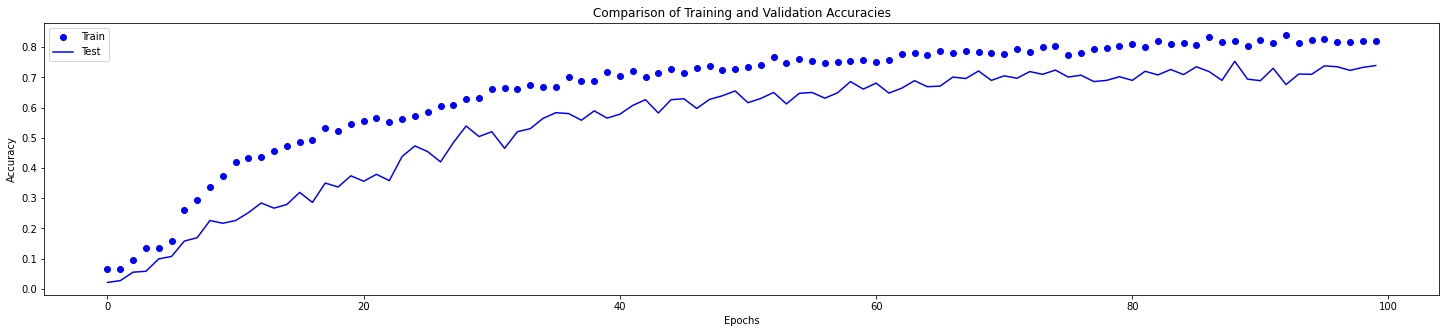

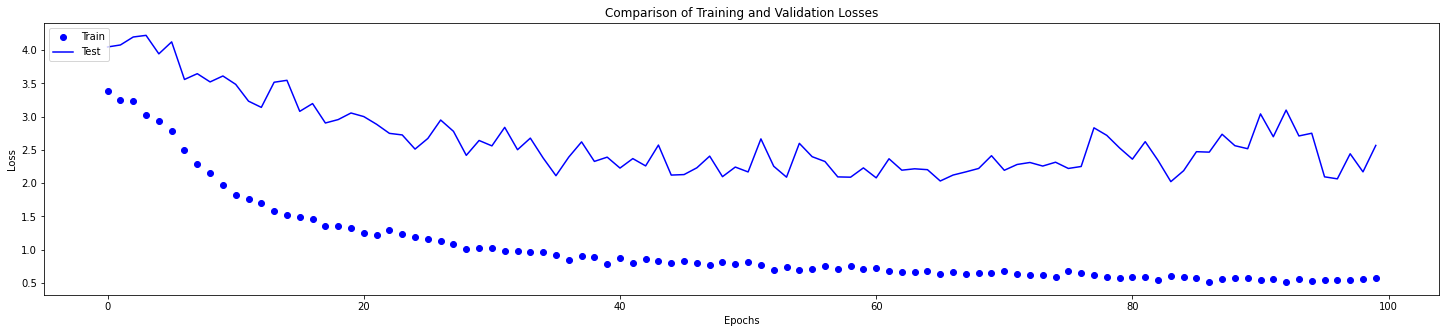

In [38]:
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

PlotAccuracyComparison(acc1, val_acc1, lab = 'Model 1')

PlotLossComparison(loss1, val_loss1, lab = 'Model 1')

### Load Model 1 to predict the results

In [30]:
from keras.models import load_model
models_dir = 'C:/CI/models/'
model1 = load_model(models_dir + 'Traffic_Recognition_model_1.h5')

### Defining categories and labelling the classes for results

In [41]:

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

### Plot and vaerify model predictions

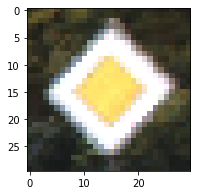

Speed limit (70km/h)


In [35]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
test_dir = 'C:/CI/Data/Test/'
image = load_img(test_dir + '\\test_20_0.png', target_size=(30,30))   # Speed20
image = load_img(test_dir + '\\test_30_0.png', target_size=(30,30))   # Speed30
image = load_img(test_dir + '\\test_priority_2.png', target_size=(30,30))   # Speed50
#image = load_img(test_dir + '\\test_50_1.png', target_size=(30,30))   # Speed50
#image = load_img(test_dir + '\\test_80_0.png', target_size=(30,30))   # Speed80
img_tensor = img_to_array(image)
img_tensor = np.expand_dims(img_tensor, axis=0)
model_predict= model1.predict_classes([img_tensor])[0]
plt.figure(figsize=(3, 3))
plt.imshow(image)
plt.show()

print(classes[model_predict+1])

In [45]:

from sklearn.metrics import classification_report, confusion_matrix

#####################################

LABELS= ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', 
         '12', '13', '14', '15', '16', '17', '18', '19', '20',
         '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
        '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42']

# Define the confusion matrix for the results
def show_confusion_matrix(validations, predictions, num_classes):
    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    #hm.invert_yaxis() # Invert the labels of the y-axis
    hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

c:\ci\python\v_env\lib\site-packages\keras\engine\training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


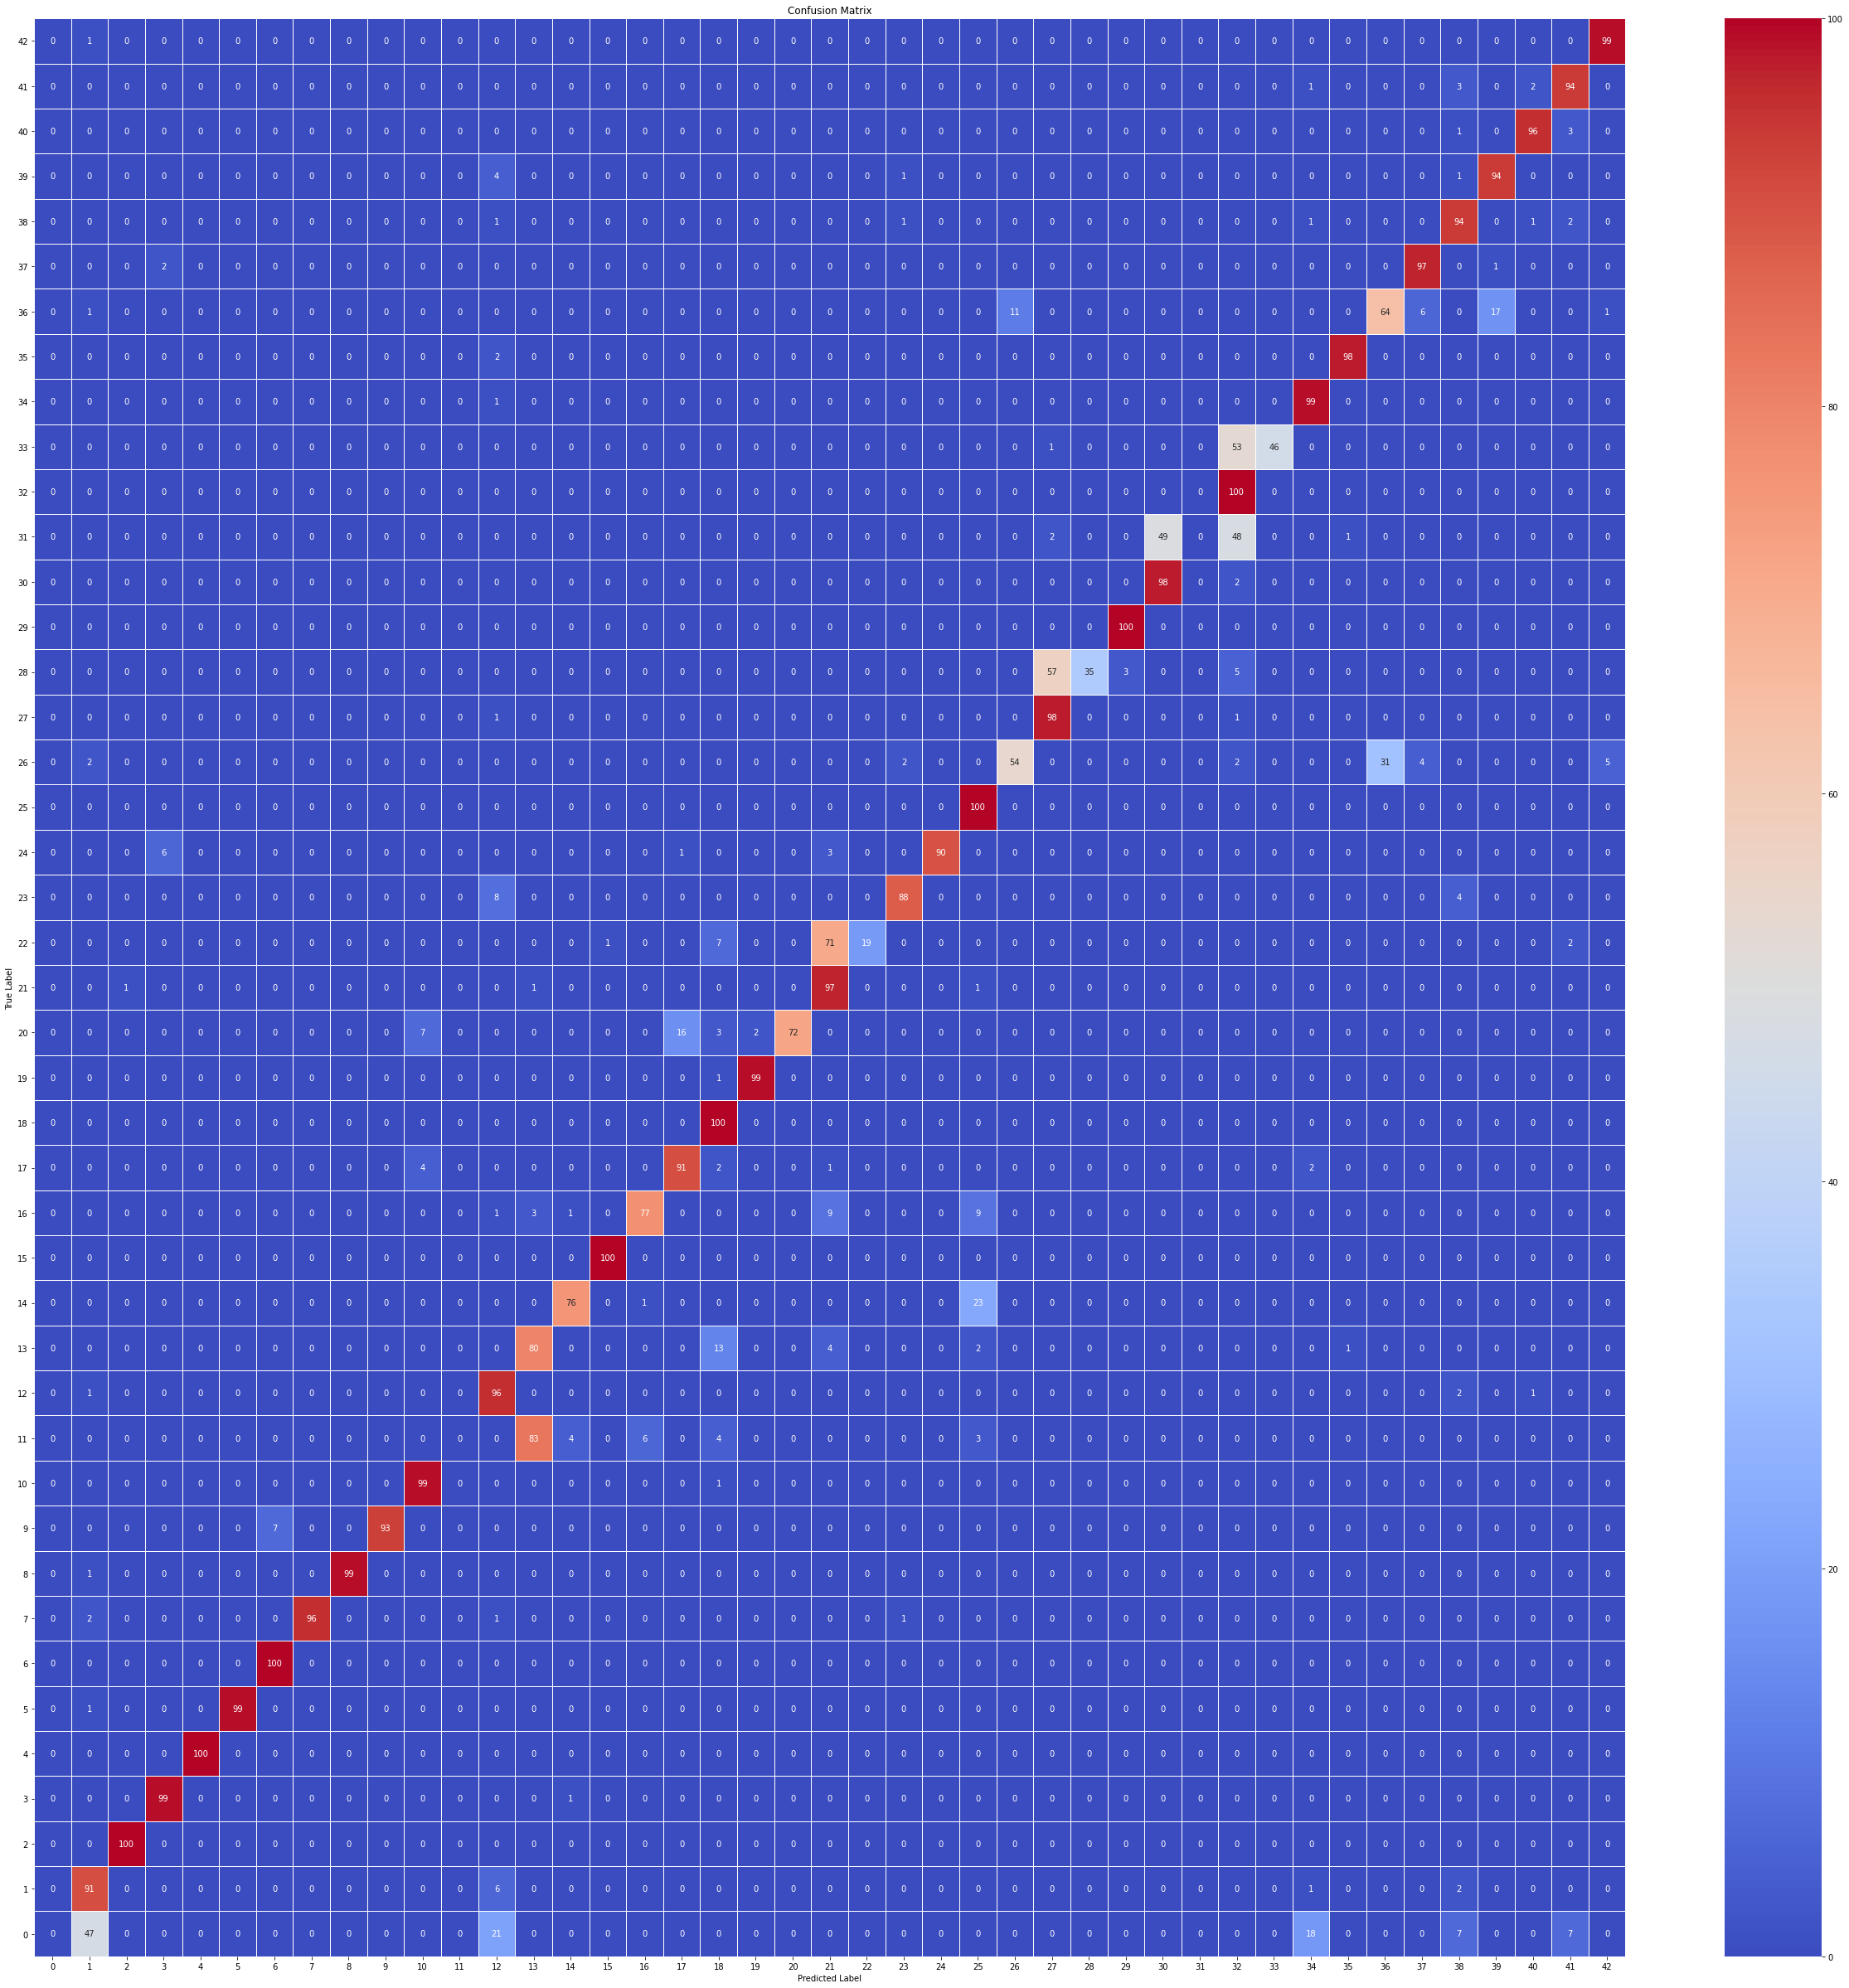

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.62      0.91      0.74       100
           2       0.99      1.00      1.00       100
           3       0.93      0.99      0.96       100
           4       1.00      1.00      1.00       100
           5       1.00      0.99      0.99       100
           6       0.93      1.00      0.97       100
           7       1.00      0.96      0.98       100
           8       1.00      0.99      0.99       100
           9       1.00      0.93      0.96       100
          10       0.90      0.99      0.94       100
          11       0.00      0.00      0.00       100
          12       0.68      0.96      0.79       100
          13       0.48      0.80      0.60       100
          14       0.93      0.76      0.84       100
          15       0.99      1.00      1.00       100
          16       0.92      0.77      0.84       100
          17       0.84    

c:\ci\python\v_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ci\python\v_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ci\python\v_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:

# Use the trained model for predictions of the val data (in this case, we use validation data as val data)
#Confution Matrix 

Y_pred = model1.predict_generator(test_generator)

y_pred = np.argmax(Y_pred, axis=1)

show_confusion_matrix(test_generator.classes, y_pred, n_classes)

print(classification_report(test_generator.classes, y_pred))

## Model TSR -2 Transfer Learning-  VGG19 model

In [3]:
from keras import applications
from keras.applications.vgg19 import VGG19


conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

#### Data Augmentation; Compile and Train

In [4]:
#Freeze the convolutional base
conv_base.trainable = False

In [5]:

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size=20

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.02,
    height_shift_range=0.05,
    shear_range=0.03,
    zoom_range=0.01,
    horizontal_flip=True)
                                  
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)
validation_generator = valid_datagen.flow_from_directory(
    # This is the target directory
    test_dir,
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)


Found 30179 images belonging to 43 classes.
Found 4300 images belonging to 43 classes.


In [21]:
from keras import models
from keras import layers

model_tf = models.Sequential()


model_tf.add(conv_base)
model_tf.add(layers.Flatten())
model_tf.add(layers.Dense(n_classes * 32, activation='relu'))
model_tf.add(layers.Dropout(0.1))
#model_tf.add(layers.Dense(n_classes * 32, activation='relu'))
#model_tf.add(layers.Dropout(0.2))
model_tf.add(layers.Dense(n_classes, activation='softmax'))


In [28]:
from keras import optimizers

opt = optimizers.SGD(learning_rate=0.01)  
model_tf.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Learning rate reduction 
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
         factor=0.5, 
         patience=5, 
         verbose=1,   
         min_lr=0.001) 

history_tf = model_tf.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      verbose=1,
      callbacks=[learning_rate_reduction])

Epoch 1/30
100/100 [==============================] - 146s 1s/step - loss: 1.8528 - accuracy: 0.4493 - val_loss: 3.3225 - val_accuracy: 0.2237
Epoch 2/30
100/100 [==============================] - 140s 1s/step - loss: 1.8347 - accuracy: 0.4400 - val_loss: 3.2188 - val_accuracy: 0.2400
Epoch 3/30
100/100 [==============================] - 138s 1s/step - loss: 1.8416 - accuracy: 0.4351 - val_loss: 3.2876 - val_accuracy: 0.2372
Epoch 4/30
100/100 [==============================] - 138s 1s/step - loss: 1.7950 - accuracy: 0.4566 - val_loss: 3.3129 - val_accuracy: 0.2172
Epoch 5/30
100/100 [==============================] - 137s 1s/step - loss: 1.7087 - accuracy: 0.4691 - val_loss: 3.2896 - val_accuracy: 0.2326
Epoch 6/30
100/100 [==============================] - 136s 1s/step - loss: 1.7520 - accuracy: 0.4570 - val_loss: 3.2671 - val_accuracy: 0.2258
Epoch 7/30
100/100 [==============================] - 137s 1s/step - loss: 1.7633 - accuracy: 0.4528 - val_loss: 3.2178 - val_accuracy: 0.2312

### Model TSR- 3  Implementation to experiment and find better results

### Converting images to numpy arrays, splitting the train dataset, data augmentation

In [63]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
##Extracting images; preprocessing
base_dir2 = 'C:/CI/Data/Traffic_Dataset/'
data = []
labels = []
for i in range(n_classes):
    path = os.path.join(base_dir2,'Train',format(i))
    images = os.listdir(path)
    for a in images:
        image = load_img(path + '\\'+ a)
       # print(image)
        image = image.resize((30,30))        
        image = np.array(image)
        data.append(image)
        labels.append(i)
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


### Splitting the data into train and validation data

In [64]:
from sklearn.model_selection import train_test_split

#Splitting 
X_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Train set size: {0}, Val set size: {1}".format(len(X_train), len(y_val)))

Train set size: 31367, Val set size: 7842


### Plotting the images from the tensor

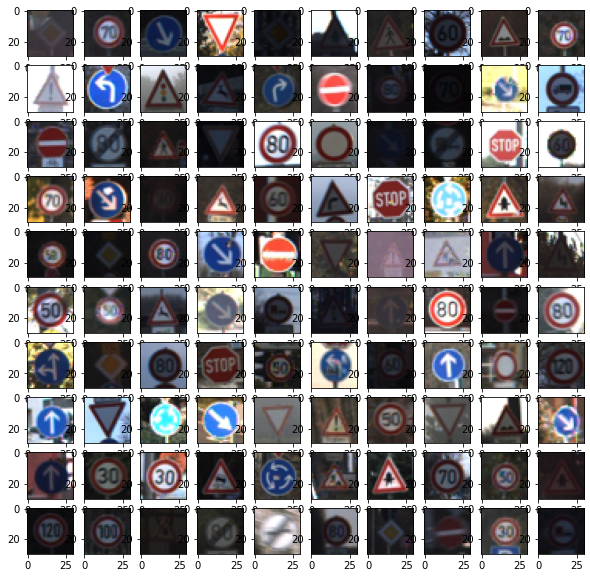

In [68]:
# Show a few sample images from the training set

import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html
plt.rcParams['figure.figsize'] = (2.5,2.5) # set default size of plots
col2 = 10
row2 = 10
fig = plt.figure(figsize=(col2, row2))
for index in range(col2*row2, col2*row2 + col2*row2):
#    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    fig.add_subplot(row2, col2, index - col2*row2 + 1)
    plt.imshow(image)
#fig = plt.figure(figsize=(20,4))
plt.show()
    


In [65]:
##One hote encoding of the data
from keras.utils import np_utils
y_train.shape[0]
y_train = np_utils.to_categorical(y_train, n_classes)
y_val = np_utils.to_categorical(y_val, n_classes)

### Model the neural network

In [66]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model2 = Sequential()
#Building the model
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(30, 30,3)))
model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.25))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.25))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(n_classes, activation='softmax'))
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 64)         

In [67]:
#Compilation of the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
datagen = ImageDataGenerator(
          rotation_range=20,       # rotate images in degrees up to the given degrees
          width_shift_range=0.1,   # shift images horizontally
          height_shift_range=0.1,  # shift images vertically
          horizontal_flip=True)    # flip images (left<->right)
# Computes the internal data stats related to the data-dependent transformations, based on an array of samples x_train
datagen.fit(X_train)

In [68]:
epochs = 15
batch_size = 32
history = model2.fit(X_train, y_train, 
                steps_per_epoch=X_train.shape[0]//batch_size, 
                epochs=15, 
                validation_data=(x_val, y_val))

Epoch 1/15
980/980 [==============================] - 113s 114ms/step - loss: 3.1807 - accuracy: 0.3454 - val_loss: 0.2373 - val_accuracy: 0.9458
Epoch 2/15
980/980 [==============================] - 109s 111ms/step - loss: 0.4880 - accuracy: 0.8578 - val_loss: 0.0829 - val_accuracy: 0.9801
Epoch 3/15
980/980 [==============================] - 114s 117ms/step - loss: 0.2507 - accuracy: 0.9294 - val_loss: 0.0560 - val_accuracy: 0.9839
Epoch 4/15
980/980 [==============================] - 111s 114ms/step - loss: 0.1997 - accuracy: 0.9422 - val_loss: 0.0371 - val_accuracy: 0.9890
Epoch 5/15
980/980 [==============================] - 109s 111ms/step - loss: 0.1665 - accuracy: 0.9529 - val_loss: 0.0318 - val_accuracy: 0.9922
Epoch 6/15
980/980 [==============================] - 111s 113ms/step - loss: 0.1441 - accuracy: 0.9608 - val_loss: 0.0431 - val_accuracy: 0.9870
Epoch 7/15
980/980 [==============================] - 115s 117ms/step - loss: 0.1466 - accuracy: 0.9617 - val_loss: 0.0260 -

### Save Model 2

In [69]:
model2.save(models_dir + 'Traffic_Recognition_model_2.h5')

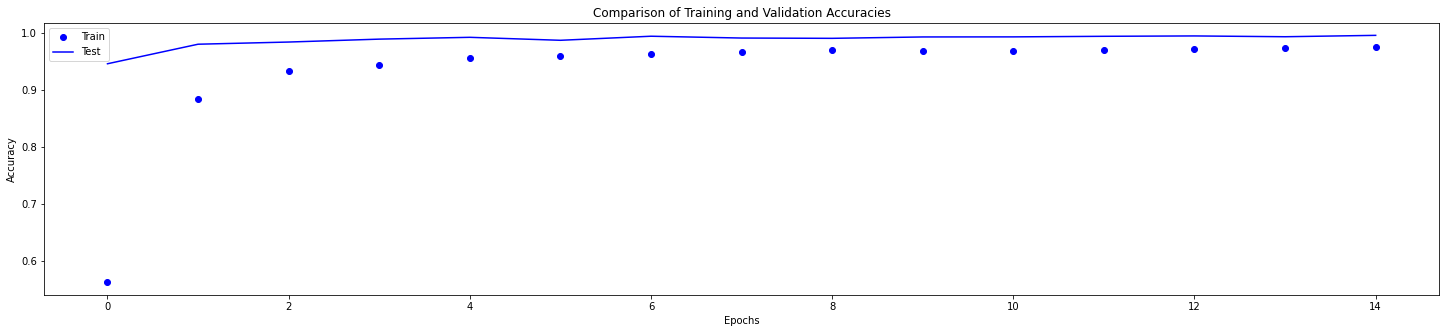

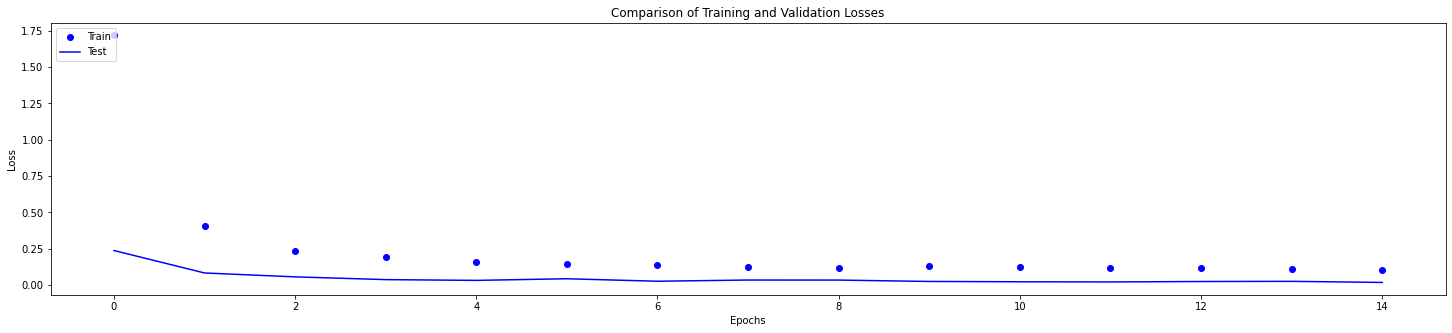

In [70]:
acc2 = history.history['accuracy']
val_acc2 = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

PlotAccuracyComparison(acc2, val_acc2, lab = 'Model 2')

PlotLossComparison(loss2, val_loss2, lab = 'Model 2')

### Load Model 3

In [39]:
from keras.models import load_model
models_dir = 'C:/CI/models/'
model2 = load_model(models_dir + 'Traffic_Recognition_model_2.h5')

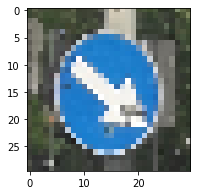

Keep right


In [48]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
test1_dir = 'C:/CI/Data/Test/'
image = load_img(test1_dir + '\\test_20_0.png', target_size=(30,30))   # Speed20
image = load_img(test1_dir + '\\test_30_0.png', target_size=(30,30))   # Speed30
#image = load_img(test1_dir + '\\test_noentry.png', target_size=(30,30))   # Speed50
#image = load_img(test1_dir + '\\test_50_1.png', target_size=(30,30))   # Speed50
#image = load_img(test1_dir + '\\test_80_0.png', target_size=(30,30))   # Speed80

#image = load_img(test1_dir + '\\test_4.png', target_size=(30,30))   # Speed50
#image = load_img(test1_dir + '\\test_priority_0.png', target_size=(30,30))   # Priority
#image = load_img(test1_dir + '\\test_priority_1.jpg', target_size=(30,30))   # Priority
image = load_img(test1_dir + '\\test_keep_left.jpg', target_size=(30,30))   # Keep right
#image = load_img(test1_dir + '\\test_stop.png', target_size=(30,30))   # Stop
#image = load_img(test1_dir + '\\test_70.png', target_size=(30,30))   # Speed70

img_tensor = img_to_array(image)
img_tensor = np.expand_dims(img_tensor, axis=0)
model_predict_2= model2.predict_classes([img_tensor])[0]
plt.figure(figsize=(3, 3))
plt.imshow(image)
plt.show()

print(classes[model_predict_2+1])

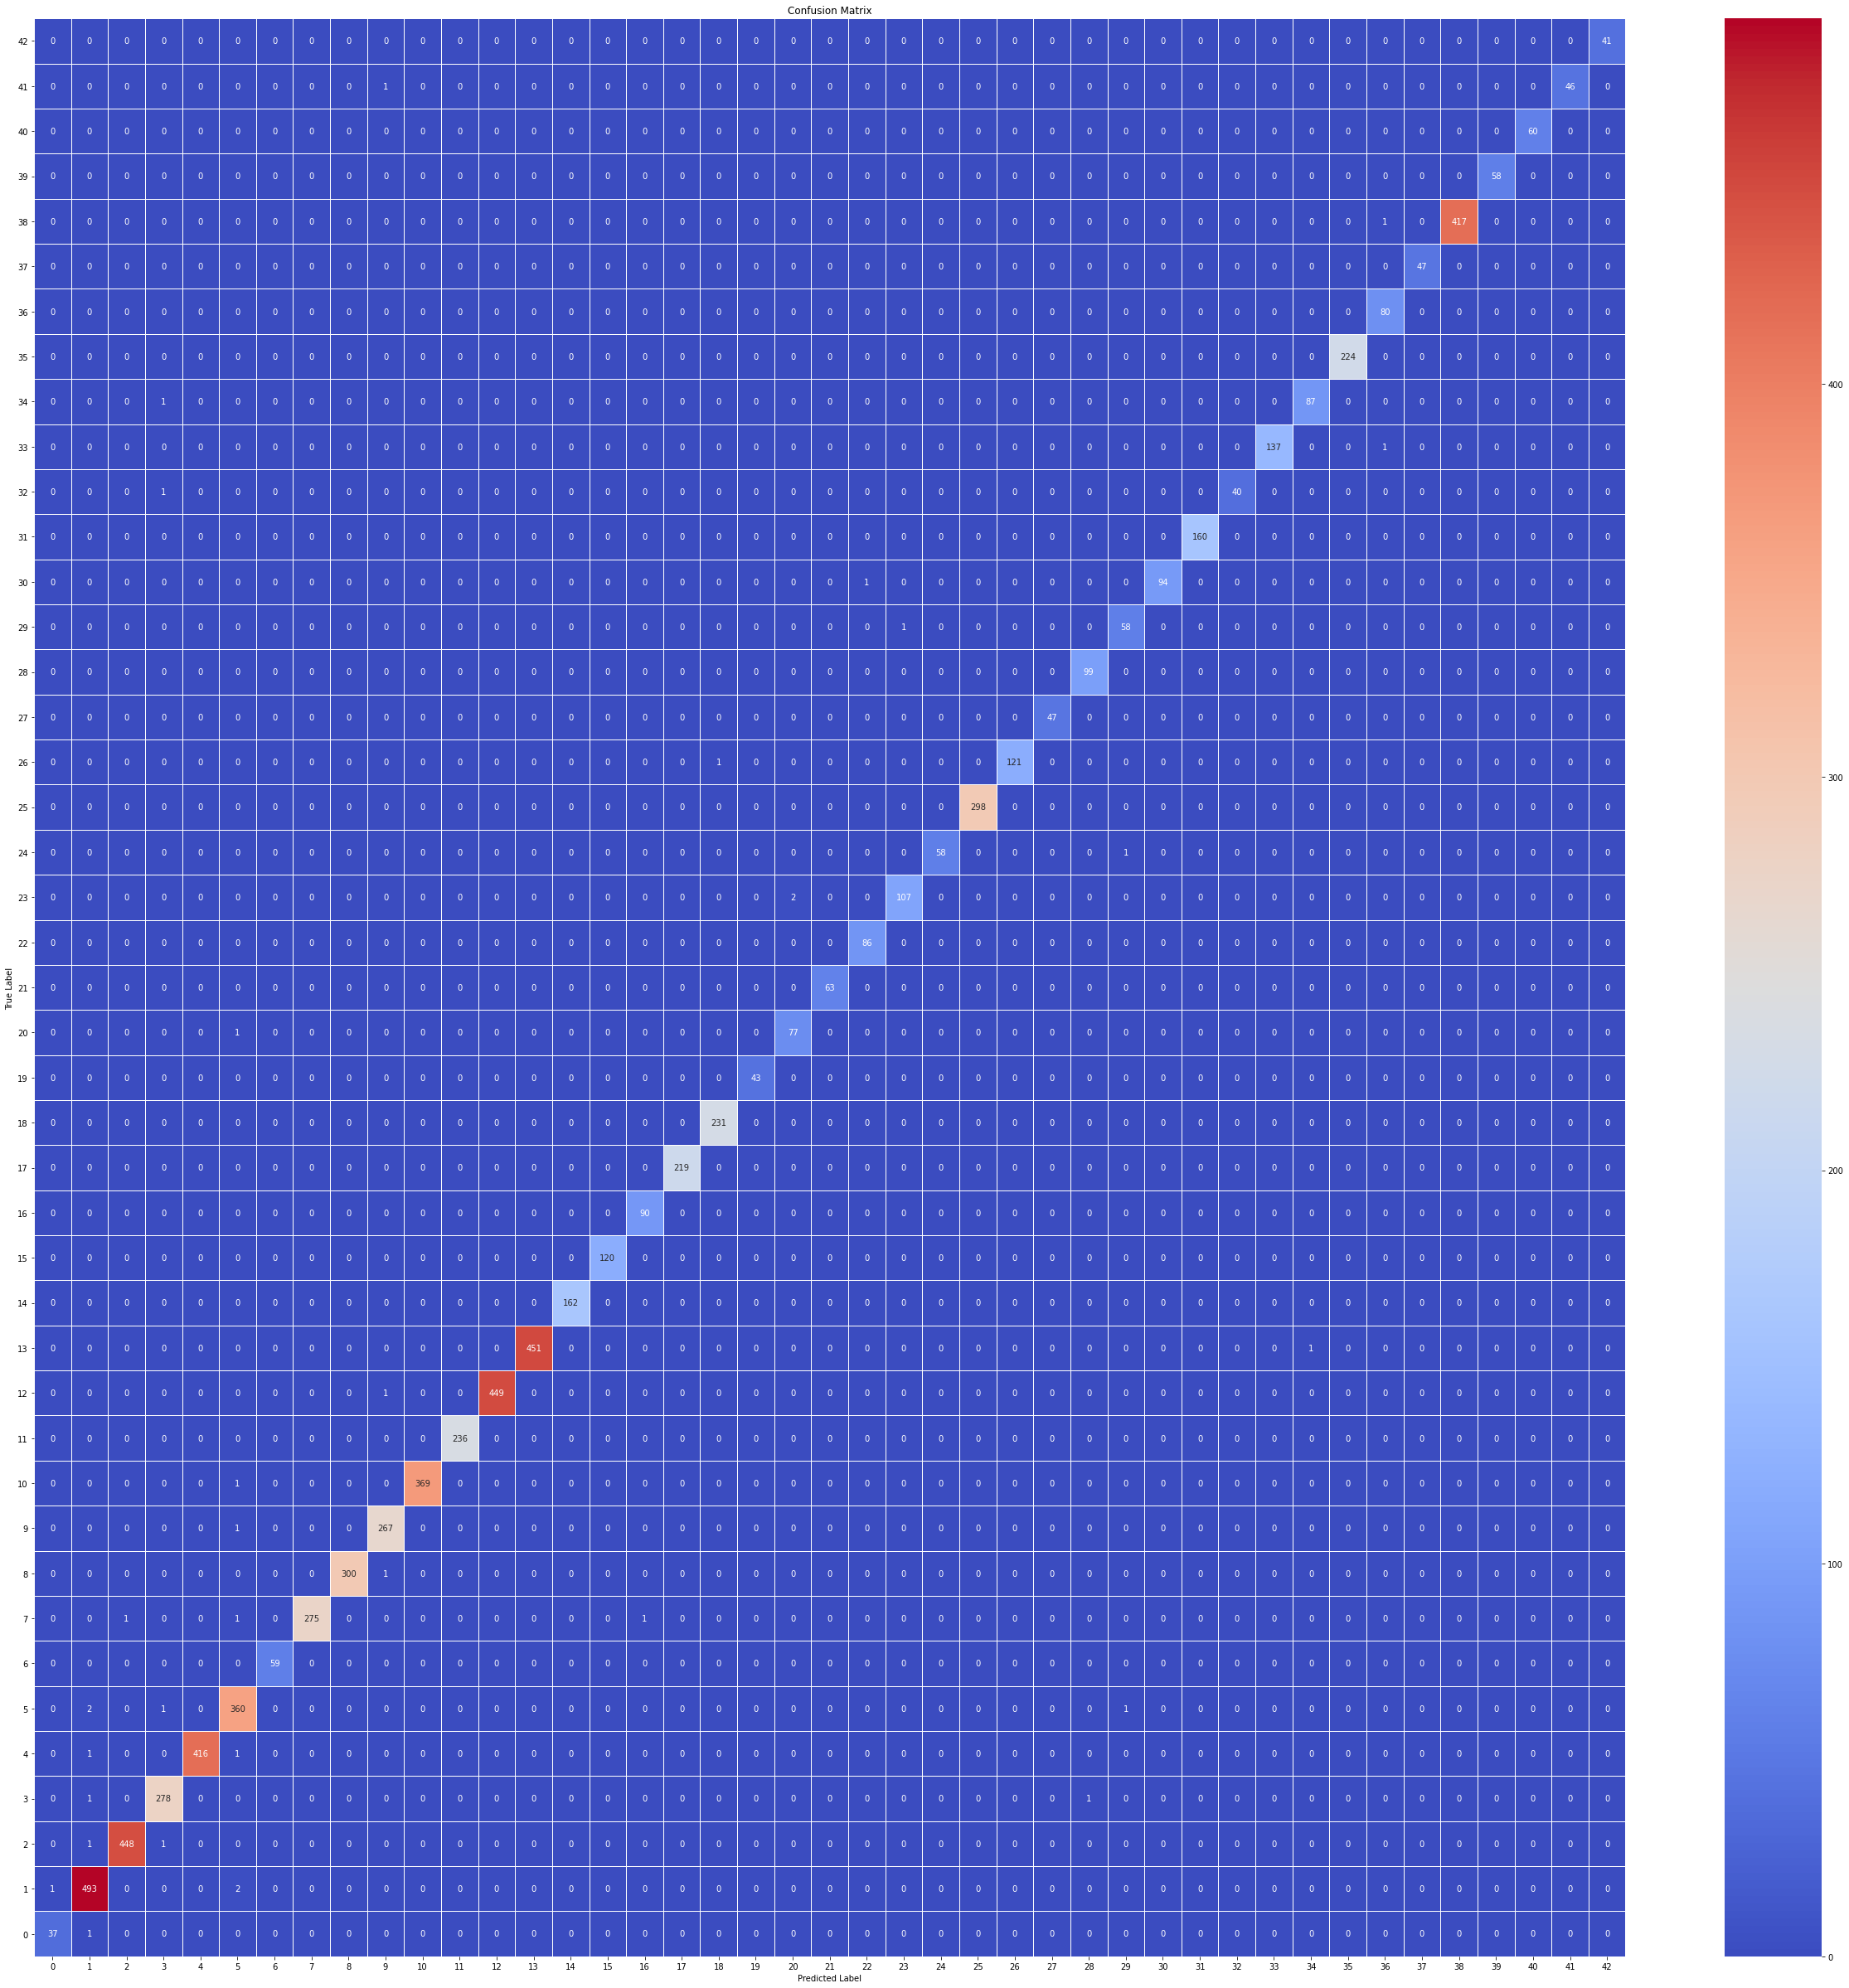

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.99      0.99      0.99       496
           2       1.00      1.00      1.00       450
           3       0.99      0.99      0.99       280
           4       1.00      1.00      1.00       418
           5       0.98      0.99      0.98       364
           6       1.00      1.00      1.00        59
           7       1.00      0.99      0.99       278
           8       1.00      1.00      1.00       301
           9       0.99      1.00      0.99       268
          10       1.00      1.00      1.00       370
          11       1.00      1.00      1.00       236
          12       1.00      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       1.00      1.00      1.00       162
          15       1.00      1.00      1.00       120
          16       0.99      1.00      0.99        90
          17       1.00    

In [73]:
# Use the trained model for predictions of the val data (in this case, we use validation data as val data)
y_pred_val = model2.predict(x_val)

# Take the class with the highest probability from the val predictions as a winning one
max_y_pred_val = np.argmax(y_pred_val, axis=1)
max_y_val = np.argmax(y_val, axis=1)

# Show the confution matrix of the collected results
show_confusion_matrix(max_y_val, max_y_pred_val, n_classes)

# Print classification report
print(classification_report(max_y_val, max_y_pred_val))

### Conclusions

The models have issues with accuracy. I have tried to add layers to decrease the error but I still have issues. 
I will continue to work on making it better. I also want to take this further to traffic sign detection in real scenarios.  